# **Final Project**
# **Laptop Price Predictor**
**Done By: Ashwin Santhanakrishnan and Aswath Santhanakrishnan<br>**
**Course: DA 515 Introduction To Machine Learning**


In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.seterr(all='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# lodaing the dataset
df = pd.read_csv(r'/Users/ashwinsanthanakrishnan/Documents/Machine Learning Project/laptop_data.csv')

In [3]:
# Lets look at the dataset
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Checking the shape of the dataset
df.shape

(1303, 12)

In [5]:
# More info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Checking for duplicate values of data
df.duplicated().sum()

np.int64(0)

# Data Preprocessing and Visualization

In [7]:
df=df.drop("Unnamed: 0", axis=1)

In [8]:
# Checking null values in the dataset
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

Checking the `Price` attribute, we can see that it is somehow left-skewed, with majority of the laptops bein in the range of `50,000-150,000`

<Axes: xlabel='Price', ylabel='Density'>

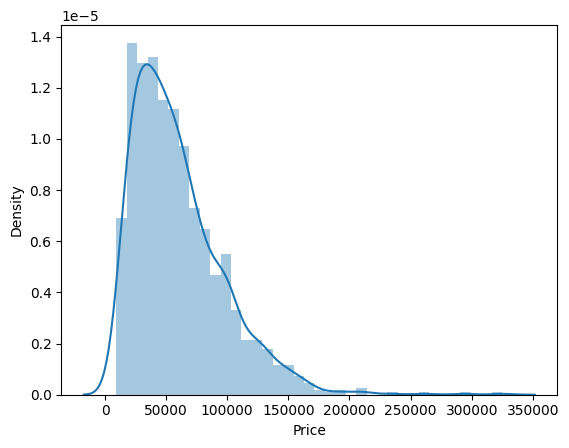

In [10]:
sns.distplot(df['Price'])

Lets have a look at the different laptop brands - we can see that `Dell` dominates the dataset

<Axes: xlabel='Company'>

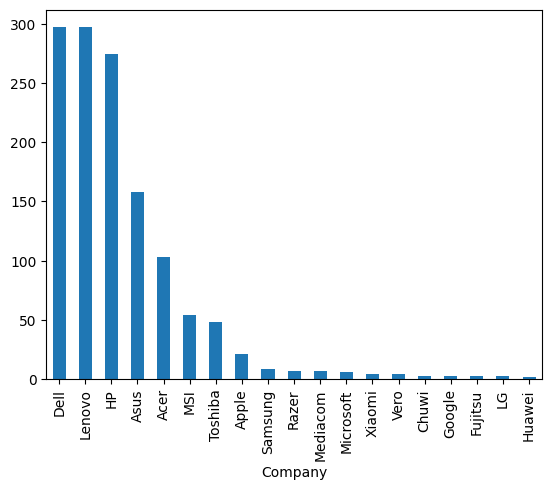

In [11]:
df['Company'].value_counts().plot(kind='bar')

How does the brand relate to pricing of a laptop ? Of course, the more extablised brands will sell their latops at a higher price than their competitors

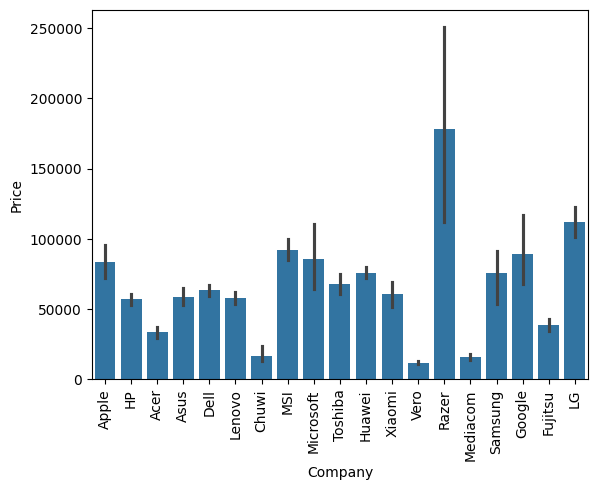

In [12]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

What different kinds of laptops we are dealing with?

<Axes: xlabel='TypeName'>

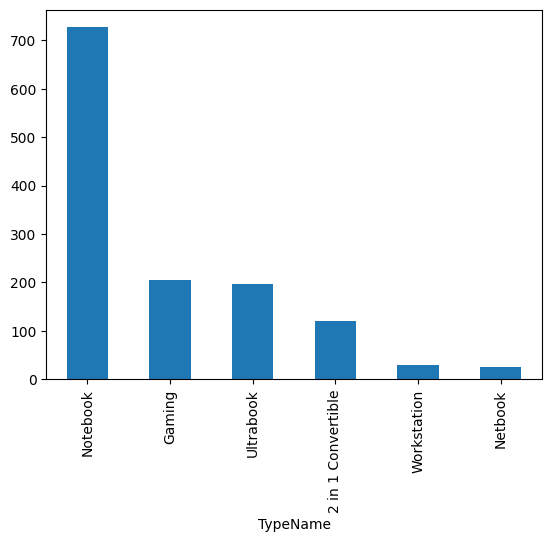

In [13]:
df['TypeName'].value_counts().plot(kind='bar')

How is a specific type of laptop related to price? Is a `Gaming` laptop more expensive? What about others? Turns out that `Workstation` is the most expensive

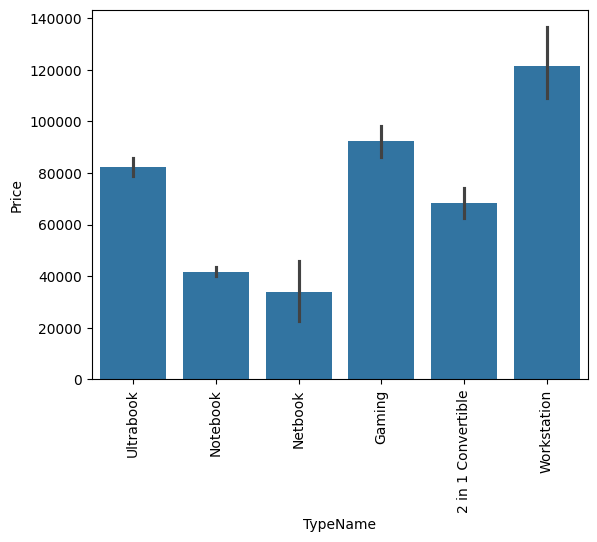

In [14]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Lets have a look at the density of `inches` - which is the screen size of the laptop. And the winner is `15.5 - 16 inches`

<Axes: xlabel='Inches', ylabel='Density'>

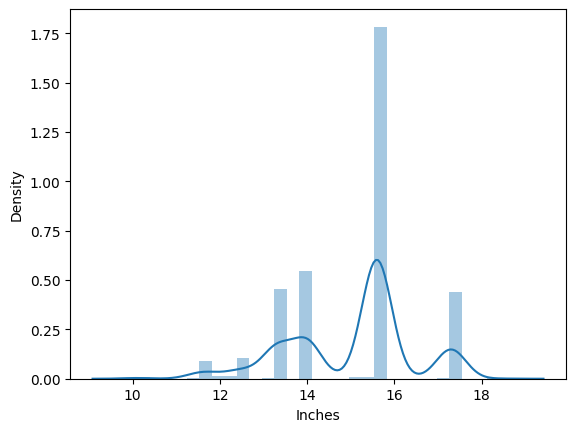

In [15]:
sns.distplot(df['Inches'])

We defined a seperate column for `Touchscreen` and visualized it

In [16]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen'>

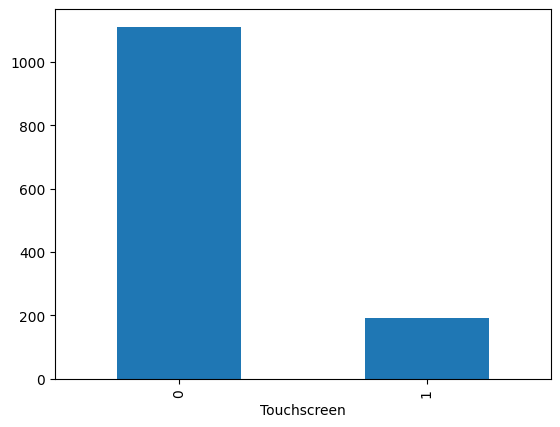

In [17]:
df['Touchscreen'].value_counts().plot(kind='bar')

What effect does `Touchscreen` have on the price of laptop? They are more expensive!

<Axes: xlabel='Touchscreen', ylabel='Price'>

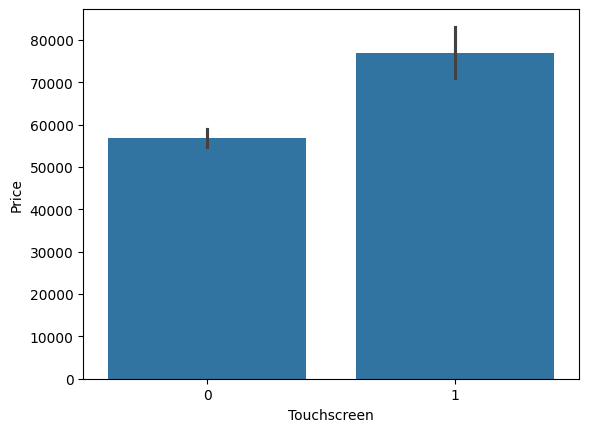

In [18]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

Since, we have the screen resolution and the size of the laptop in inches, we can go ahead and find the `Pixels per Inch` count, and check and see if this attribute has any importance to the price of a laptop

In [19]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_res'] = new[0].str.replace(',', '').str.extract(r'(\d+\.?\d+)').astype('int')
df['Y_res'] = new[1].str.replace(',', '').str.extract(r'(\d+\.?\d+)').astype('int')
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')

In [20]:
#df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

Lets segregate, the CPU name and its brand

In [21]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [22]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [23]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [24]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

The memory column of the data needed attention. It had a lot of different values, multiple memorys' and different kinds of memories. Standardizing all this data into seperate columns

In [25]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = pd.to_numeric(df["first"], errors='coerce').fillna(0).astype(int)
df["second"] = pd.to_numeric(df["second"], errors='coerce').fillna(0).astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage', 'Memory'],inplace=True)

Similarly, we did it for `Ips` and checked it relation to pricing of a laptop

In [26]:
df.columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Ram', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'ppi', 'Cpu brand', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage'],
      dtype='object')

In [27]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips'>

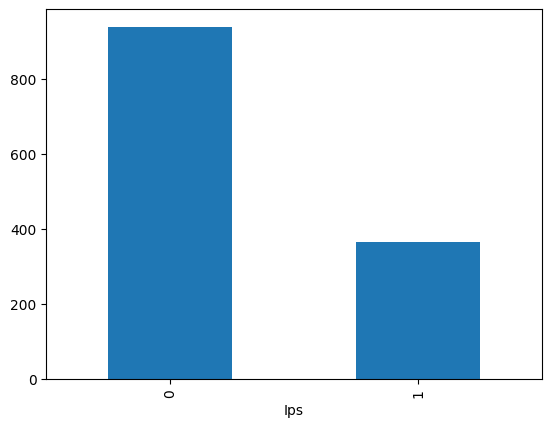

In [28]:
df['Ips'].value_counts().plot(kind='bar')

Laptops with In-plane switching are more expensive than the ones that do not have it

<Axes: xlabel='Ips', ylabel='Price'>

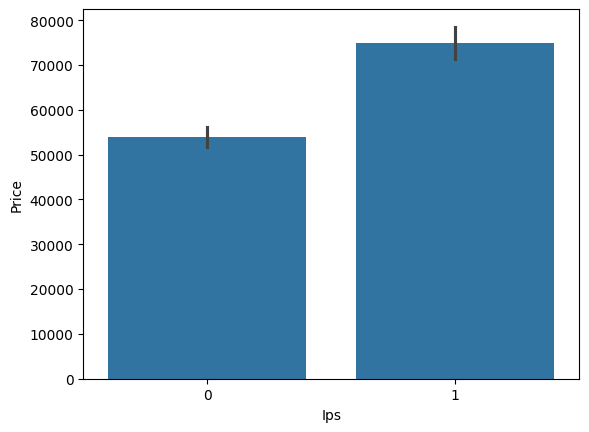

In [29]:
sns.barplot(x=df['Ips'],y=df['Price'])

Performing the same setps above on the `Ram` variable, we can see that, higher the RAM, higher its price

<Axes: xlabel='Ram'>

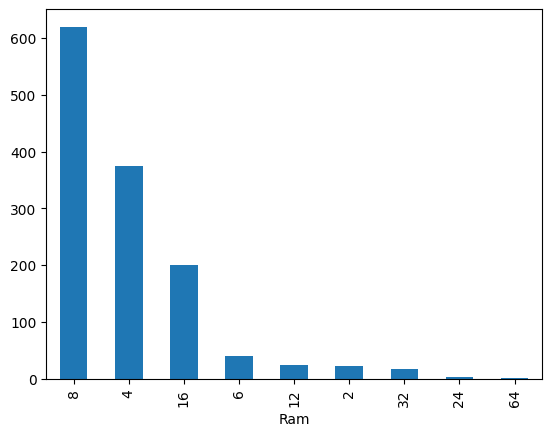

In [30]:
df['Ram'].value_counts().plot(kind='bar')

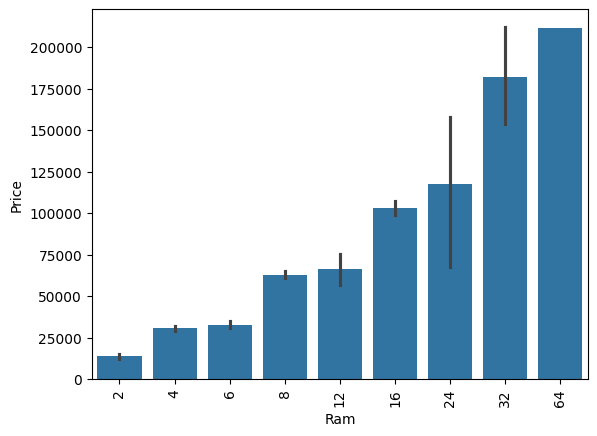

In [31]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
# Checking data co-relation
df.select_dtypes(include=['number']).corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Ips              0.252208
Name: Price, dtype: float64

In [33]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

The `Gpu` column also needed preprocessing before we could use it

In [34]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [35]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df = df[df['Gpu brand'] != 'ARM']

In [36]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

Lets look at the price of the laptops having different brands of GPUs

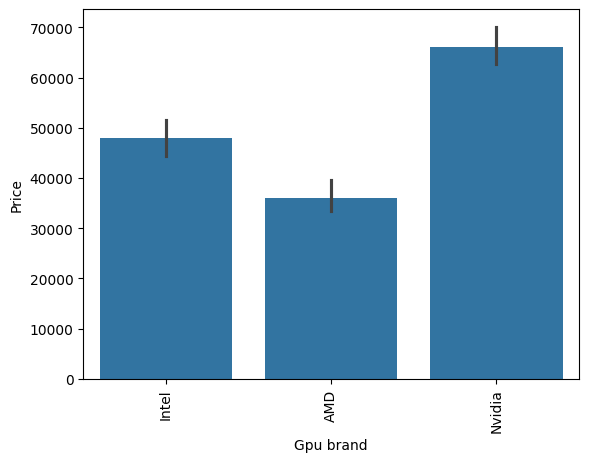

In [37]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
df.drop(columns=['Gpu'],inplace=True)

Next up is `Operating system`

In [39]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Looks like a tuff race between macOS and Windows

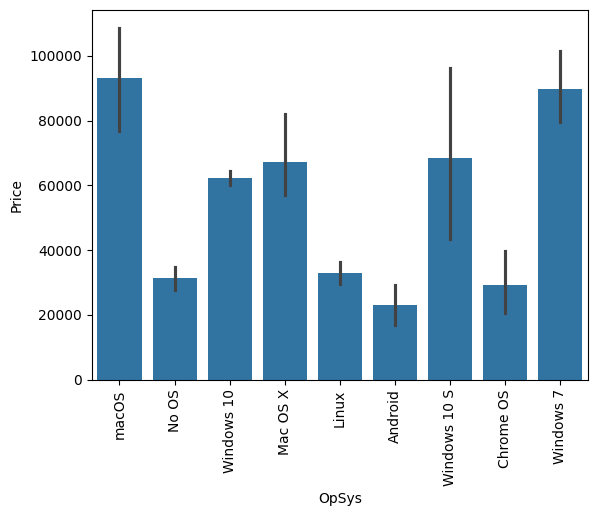

In [40]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Since, there are multiple Windows version, we combined them into one, and then again had a look at the plot

In [41]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [42]:
df['os'] = df['OpSys'].apply(cat_os)

In [43]:
df.drop(columns=['OpSys'],inplace=True)

Much better. We can see that mac is leading the way!

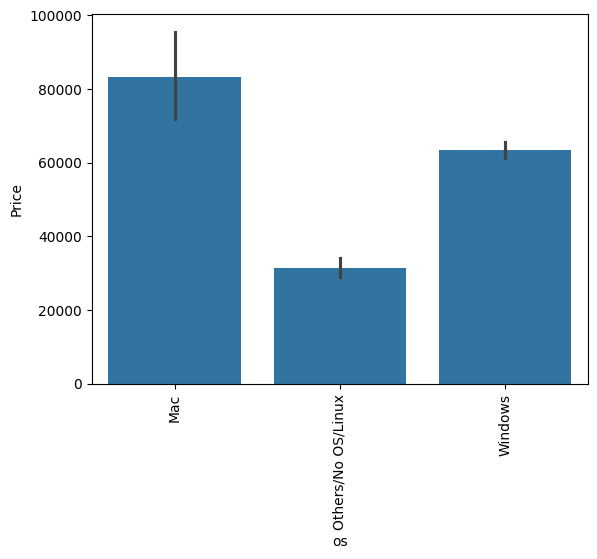

In [44]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Lastly, let us have a look at the distribution of the `Weight` of the laptop.

<Axes: xlabel='Weight', ylabel='Density'>

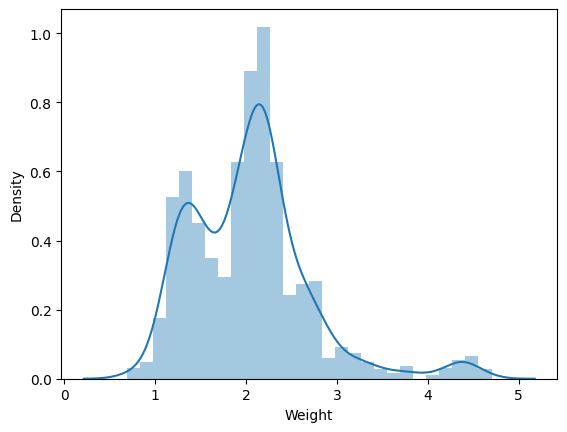

In [45]:
sns.distplot(df['Weight'])

Comparing it to the Price of a laptop, not much can be inferred from here to be honest, but there sure is an increase in price that are relatively heavier

<Axes: xlabel='Weight', ylabel='Price'>

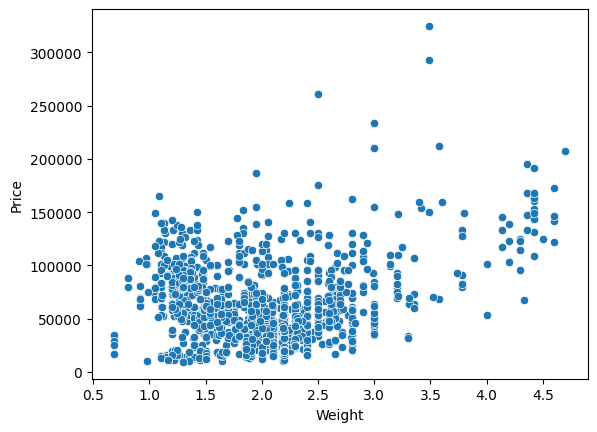

In [46]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

# Model creating and evaluation

In [47]:
# Looking at the attribute co-relation
df.select_dtypes(include=['number']).corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Ips            0.253320
Name: Price, dtype: float64

Co-relation Matrix

<Axes: >

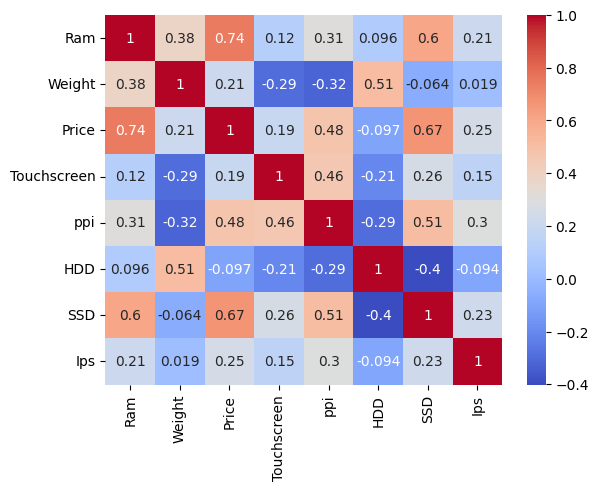

In [48]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

Checking the distribution of the `Price` variable

<Axes: xlabel='Price', ylabel='Density'>

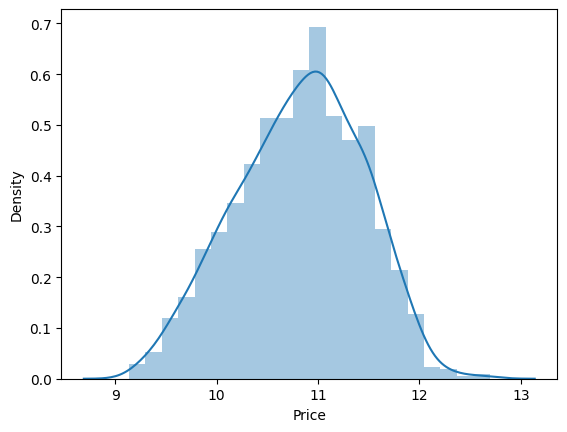

In [49]:
sns.distplot(np.log(df['Price']))

We can see that it is normally distributed

In [50]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [51]:
X

,Company,TypeName,ScreenResolution,Ram,Weight,Touchscreen,ppi,Cpu brand,HDD,SSD,Ips,Gpu brand,os
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,1.37,0,226.983005,Intel Core i5,0,128,1,Intel,Mac
1,Apple,Ultrabook,1440x900,8,1.34,0,127.677940,Intel Core i5,0,0,0,Intel,Mac
2,HP,Notebook,Full HD 1920x1080,8,1.86,0,141.211998,Intel Core i5,0,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,1.83,0,220.534624,Intel Core i7,0,512,1,AMD,Mac
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,1.37,0,226.983005,Intel Core i5,0,256,1,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,4,1.80,1,157.350512,Intel Core i7,0,128,1,Intel,Windows
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,1.30,1,276.053530,Intel Core i7,0,512,1,Intel,Windows
1300,Lenovo,Notebook,1366x768,2,1.50,0,111.935204,Other Intel Processor,0,0,0,Intel,Windows
1301,HP,Notebook,1366x768,6,2.19,0,100.454670,Intel Core i7,1000,0,0,AMD,Windows


In [52]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [53]:
# Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)



In [54]:
X_train

,Company,TypeName,ScreenResolution,Ram,Weight,Touchscreen,ppi,Cpu brand,HDD,SSD,Ips,Gpu brand,os
183,Toshiba,Notebook,1366x768,8,2.00,0,100.454670,Intel Core i5,0,128,0,Intel,Windows
1141,MSI,Gaming,Full HD 1920x1080,8,2.40,0,141.211998,Intel Core i7,1000,128,0,Nvidia,Windows
1049,Asus,Netbook,1366x768,4,1.20,0,135.094211,Other Intel Processor,0,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,4,2.08,1,141.211998,Intel Core i3,1000,0,1,Intel,Windows
878,Dell,Notebook,Full HD 1920x1080,4,2.18,0,141.211998,Intel Core i5,1000,128,0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,1366x768,4,2.20,0,100.454670,Intel Core i3,500,0,0,Nvidia,Windows
299,Asus,Ultrabook,Full HD 1920x1080,16,1.63,0,141.211998,Intel Core i7,0,512,0,Nvidia,Windows
493,Acer,Notebook,1366x768,8,2.20,0,100.454670,AMD Processor,1000,0,0,AMD,Windows
527,Lenovo,Notebook,1366x768,8,2.20,0,100.454670,Intel Core i3,2000,0,0,Nvidia,Others/No OS/Linux


### Linear regression

In [55]:
from sklearn.metrics import mean_squared_error

# Extracting numeric features from ScreenResolution
X_train['X_res'] = df.loc[X_train.index, 'ScreenResolution'].str.split('x').str[0].str.extract(r'(\d+)').astype(int)
X_train['Y_res'] = df.loc[X_train.index, 'ScreenResolution'].str.split('x').str[1].str.extract(r'(\d+)').astype(int)
X_test['X_res'] = df.loc[X_test.index, 'ScreenResolution'].str.split('x').str[0].str.extract(r'(\d+)').astype(int)
X_test['Y_res'] = df.loc[X_test.index, 'ScreenResolution'].str.split('x').str[1].str.extract(r'(\d+)').astype(int)

# Dropping the original ScreenResolution column
X_train.drop(columns=['ScreenResolution'], inplace=True)
X_test.drop(columns=['ScreenResolution'], inplace=True)

# Correcting the column indices for OneHotEncoder
categorical_columns = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_indices)
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r1=r2_score(y_test,y_pred)


print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score 0.8045951062457878
MAE 0.21040049450622775
MSE: 0.07475236090509452


### KNN

In [56]:
# Ensure OneHotEncoder is applied to categorical columns properly
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_indices)
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('R2 score', r2)
print('MAE', mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score 0.7951276399473145
MAE 0.196584271697655
MSE: 0.07837415073851847


### Decision Tree

In [57]:
import sklearn.metrics as metrics
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_indices)
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r3 = r2_score(y_test, y_pred)

print('R2 score', r3)
print('MAE', mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score 0.8374719727159387
MAE 0.18696213020772967
MSE: 0.06217527882394351


### Random Forest

In [58]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_indices)
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r4 = r2_score(y_test, y_pred)

print('R2 score', r4)
print('MAE', mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score 0.8856400734714517
MAE 0.1606923276306858
MSE: 0.04374851794497527
